<a href="https://colab.research.google.com/github/Frutta111/ML-Algorithms-on-MNIST/blob/main/Part_C_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part C - Linear Regression**

# **Getting depnedncies (and data!)**




## Import relevant libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import timedelta
import time


##Fetch MNIST Dataset
The MNIST dataset serves as a cornerstone in the domain of digit classification. It comprises a collection of 28x28 pixel grayscale images, each depicting a handwritten digit (0 through 9). Originating from the National Institute of Standards and Technology (NIST).
Key Characteristics of MNIST:
- **Image Size:** Each image is 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels per image.
- **Grayscale Images**: The images are grayscale, with each pixel represented by a single intensity value ranging from 0 (black) to 255 (white).
- **Handwritten Digits**: The dataset primarily consists of handwritten digits, introducing variations in writing styles, slants, and sizes.
- **Labeling**: Each image is associated with a label (digit from 0 to 9), creating a ten-class classification problem.

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#**Data Preparation**

##Data Partitioning
Divide the original MNIST dataset into two subsets: a training set containing 60,000 images and a test set containing 10,000 images. The 'train_test_split' function from the scikit-learn module can be employed for this purpose.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print ("The size of X_train is:", X_train.shape)
print ("The size of X_test is:", X_test.shape)

# Normalize features values
X_train = X_train / 255.0
X_test = X_test / 255.0

The size of X_train is: (60000, 784)
The size of X_test is: (10000, 784)


##Label and Image Transformation
**One-Hot Vector Representation**: transform the digit labels into one-hot vectors. Each label, such as '5', will be represented as [0,0,0,0,0,1,0,0,0,0], and '0' will correspond to [1,0,0,0,0,0,0,0,0,0].



In [ ]:
labels_train = y_train.astype(int)
labels_test = y_test.astype(int)

# Number of classes (digits 0-9)
num_classes = 10

# Transform labels to one-hot vectors
one_hot_labels_train = np.zeros((len(labels_train), num_classes))
one_hot_labels_train[np.arange(len(labels_train)), labels_train] = 1

one_hot_labels_test = np.zeros((len(labels_test), num_classes))
one_hot_labels_test[np.arange(len(labels_test)), labels_test] = 1

print(one_hot_labels_train.shape)


(60000, 10)


**Flattening Images**: Flatten the input images to create a vector representation. Each original image, initially of size 28x28 pixels, should be transformed into a vector of size 785x1. The first component of this vector represents the bias term and is set to 1.

In [ ]:
# Flattening input images and adding bias term
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
image_size = X_train.shape[1]  # Image size before flattening (28x28 = 784 pixels)

# Flatten training set
X_train_flattened = np.c_[np.ones((num_samples_train, 1)), X_train]  # Add bias term (column of 1s)
X_train_flattened = X_train_flattened.reshape(num_samples_train, image_size + 1)  # Reshape to 785x1

# Flatten test set
X_test_flattened = np.c_[np.ones((num_samples_test, 1)), X_test]  # Add bias term (column of 1s)
X_test_flattened = X_test_flattened.reshape(num_samples_test, image_size + 1)  # Reshape to 785x1

# Display the shape of the flattened datasets
print("Flattened Training Data Shape:", X_train_flattened.shape)
print("Flattened Test Data Shape:", X_test_flattened.shape)


Flattened Training Data Shape: (60000, 785)
Flattened Test Data Shape: (10000, 785)


### Model evaluation and performance visualization utilities

In [ ]:
# Create confusion matrix for multinomial classification

def multi_confusion_matrix(y_true, y_pred, class_labels=None, figsize=(18, 6), title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate metrics: Accuracy
    total = np.sum(conf_matrix)
    accuracy = np.trace(conf_matrix) / float(total)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title}\nAccuracy={accuracy*100:.2f}%')
    plt.show()

# Create confusion matrix for per digit using heatmap
def heat_digit_confusion_matrix(y_true, y_pred, num_classes=10):
    for digit in range(num_classes):
        # Create confusion matrix
        conf_matrix = confusion_matrix(y_true[:, digit], y_pred[:, digit])

        # Calculate metrics: Accuracy, TPR, TNR
        total = np.sum(conf_matrix)
        accuracy = np.trace(conf_matrix) / float(total)  # ACC = (TP + TN) / (TP + TN + FP + FN)
        tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :]))  # TPR = TP / (TP + FN)
        tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :]))  # TNR = TN / (TN + FP)

        # Plot confusion matrix using seaborn heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'],
                    cbar=digit == num_classes - 1)  # Show colorbar only for the last subplot
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Digit {digit}\nAcc={accuracy*100:.2f}%, TPR={tpr*100:.2f}%, TNR={tnr*100:.2f}%')
        plt.show()

# Create confusion matrix for per digit - in a compact display
def digit_confusion_matrix(y_true, y_pred, num_classes=10):
    for digit in range(num_classes):
        # Create confusion matrix
        conf_matrix = confusion_matrix(y_true[:, digit], y_pred[:, digit])

        # Calculate metrics: Accuracy, TPR, TNR
        total = np.sum(conf_matrix)
        accuracy = np.trace(conf_matrix) / float(total)  # ACC = (TP + TN) / (TP + TN + FP + FN)
        tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :]))  # TPR = TP / (TP + FN)
        tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :]))  # TNR = TN / (TN + FP)

        print(f'\nDigit {digit}: Acc={accuracy*100:.2f}%, TPR={tpr*100:.2f}%, TNR={tnr*100:.2f}%')
        print(conf_matrix)

#**Part C - Linear Regression**

I implemented the linear regression model for the digit classification problem as follows. For each digit, I created a one-hot vector with values of +1 and -1 to use the One-vs-All method. I applied the linear regression model to each digit separately in a mutually independent manner. Classification for each digit was done by applying the sign function to the prediction. Multi-class classification was performed by choosing the digit for which the highest prediction was obtained. This operating method is very similar to the operation method of the perceptron model.

To overcome the singularity issue of the matrix (X^tX), I calculated the pseudo-inverse matrix using the np.linalg.pinv function, which computes the Moore-Penrose pseudo-inverse of a Hermitian matrix. The loss function in linear regression is the least squares function.

The use of the linear regression model is not particularly suitable in this case because the model is suitable for cases where the target variable takes continuous values, but sometimes the model performs well. The advantage of the model lies in the simplicity of complexity as the solution to the least squares problem is analytical and unique in the case where the matrix (X^tX) is invertible.

To evaluate the model's quality and performance, I conducted an analysis in three parts:
1) Calculating the loss function on the training and test data for each digit separately, and computing the accuracy rate and confusion matrix for multi-class classification.
2) Calculating confusion matrices and metrics for each digit separately obtained from the prediction method using multi-class classification.
3) Computing confusion matrices for each digit obtained from the binary classification method.

In [ ]:
num_features = X_train_flattened.shape[1]
num_classes = one_hot_labels_train.shape[1]

# Transform labels
y_train_reg = np.copy(one_hot_labels_train)
y_train_reg[y_train_reg == 0] = -1


# x = 60000 X 785
# y = 785 X 10

# Calculate the optimal parameters directly using the normal equation
def linear_reg_weights (x, y):
  beta = np.linalg.pinv(x.T @ x ) @ x.T @ y
  return beta

def activation (x, beta):
  y_hat = x @ beta
  return y_hat

def multiclass_predict(x, beta):
    y_hat = activation(x, beta)
    prediction =  np.argmax(y_hat, axis=1)
    return prediction

def least_square_loss(y, y_hat):
    loss = np.mean((y - y_hat) ** 2, axis=0)
    return loss

def accuracy(y_pred, y_true):
    correctly_predicted = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
    acc = (100.0 * correctly_predicted) / y_pred.shape[0]
    return acc

start_time = time.time() # Record the start time

weights = linear_reg_weights(X_train_flattened, y_train_reg )
y_hat_train = activation(X_train_flattened, weights)
y_hat_test = activation(X_test_flattened, weights)

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time

# E_in = least_square_loss(one_hot_labels_train, y_hat_train)
# E_out = least_square_loss(one_hot_labels_test, y_hat_test)

print ("Training loss (least squares) : " ,least_square_loss(one_hot_labels_train, y_hat_train))
print ("Test loss (least squares) : : ",least_square_loss(one_hot_labels_test, y_hat_test))
print ("Training accuracy : " ,accuracy(y_hat_train , one_hot_labels_train))
print ("Test accuracy : ",accuracy(y_hat_test , one_hot_labels_test))

print(f"\nElapsed time: {elapsed_time:.2f} seconds") # Print the elapsed time


Training loss (least squares) :  [0.90133333 0.88791667 0.89961667 0.89821667 0.90136667 0.9104
 0.90141667 0.89603333 0.9024     0.9013    ]
Test loss (least squares) : :  [0.89875872 0.89086336 0.88922357 0.90377525 0.89016972 0.91792128
 0.91926435 0.89697912 0.93451669 0.90935479]
Training accuracy :  85.95333333333333
Test accuracy :  85.13

Elapsed time: 10.51 seconds


##**Evaluation 1: Present confusion matrix for multi-class classification**

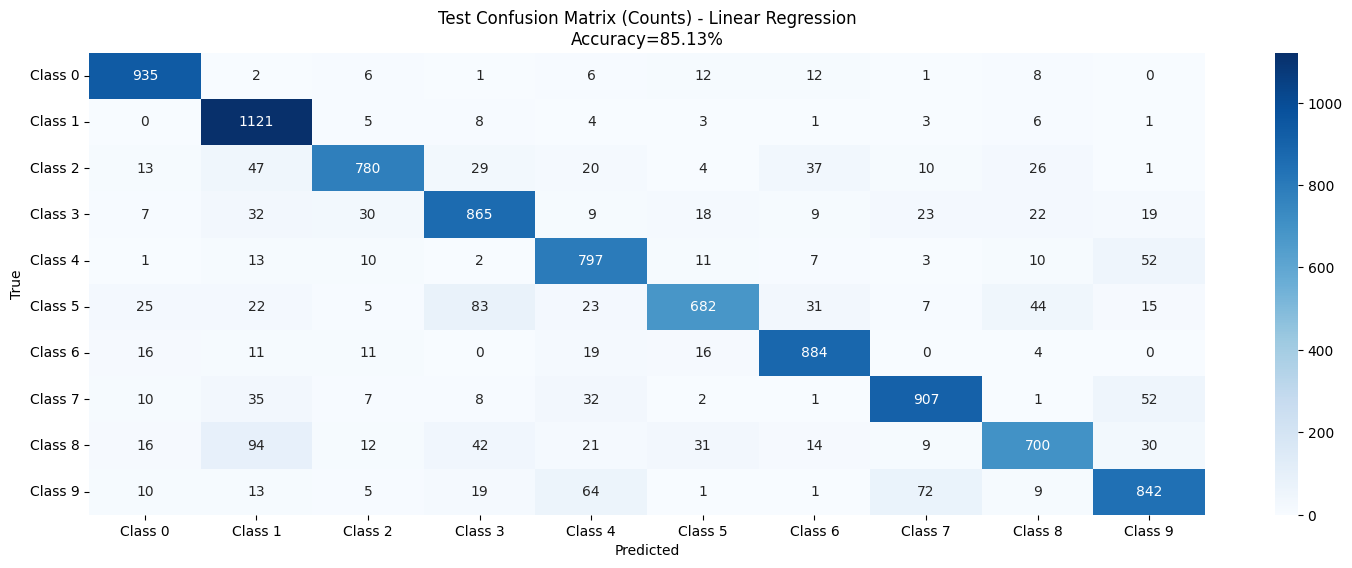

In [ ]:
y_pred_train = multiclass_predict(X_train_flattened, weights)
y_pred_test = multiclass_predict(X_test_flattened, weights)
y_true_test = labels_test

# Create confusion matrix
multi_confusion_matrix(y_true_test, y_pred_test, class_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'] , title = "Test Confusion Matrix (Counts) - Linear Regression")


##**Evaluation 2: present confusion matrix for each digit using multi-class method**




In [ ]:
# Transform to y_pred binary matrix
num_samples = len(y_pred_test)
num_classes = 10

y_pred_one_hot = np.zeros((num_samples, num_classes))
y_pred_one_hot[np.arange(num_samples), y_pred_test] = 1

y_true_one_hot = one_hot_labels_test

# Create confusion matrix per digit
digit_confusion_matrix(y_true_one_hot, y_pred_one_hot)


Digit 0: Acc=98.54%, TPR=95.12%, TNR=98.91%
[[8919   98]
 [  48  935]]

Digit 1: Acc=97.00%, TPR=97.31%, TNR=96.96%
[[8579  269]
 [  31 1121]]

Digit 2: Acc=97.22%, TPR=80.66%, TNR=98.99%
[[8942   91]
 [ 187  780]]

Digit 3: Acc=96.39%, TPR=83.66%, TNR=97.86%
[[8774  192]
 [ 169  865]]

Digit 4: Acc=96.93%, TPR=87.97%, TNR=97.82%
[[8896  198]
 [ 109  797]]

Digit 5: Acc=96.47%, TPR=72.79%, TNR=98.92%
[[8965   98]
 [ 255  682]]

Digit 6: Acc=98.10%, TPR=91.99%, TNR=98.75%
[[8926  113]
 [  77  884]]

Digit 7: Acc=97.24%, TPR=85.97%, TNR=98.57%
[[8817  128]
 [ 148  907]]

Digit 8: Acc=96.01%, TPR=72.24%, TNR=98.56%
[[8901  130]
 [ 269  700]]

Digit 9: Acc=96.36%, TPR=81.27%, TNR=98.10%
[[8794  170]
 [ 194  842]]


##**Evaluation 3: present confusion matrix for each digit using binary-class method**

In [ ]:
# binary prediction of linear regression for each digit separately

def binary_predict(y_hat):
    # Apply the condition: 1 if greater than or equal to 0, else -1
    prediction = (y_hat > 0) * 1
    return prediction

y_pred_one_hot =  binary_predict(y_hat_test)
y_true_one_hot = one_hot_labels_test

# Create confusion matrix per digit
digit_confusion_matrix(y_true_one_hot, y_pred_one_hot)


Digit 0: Acc=98.38%, TPR=86.98%, TNR=99.62%
[[8983   34]
 [ 128  855]]

Digit 1: Acc=98.07%, TPR=91.41%, TNR=98.94%
[[8754   94]
 [  99 1053]]

Digit 2: Acc=96.29%, TPR=67.11%, TNR=99.41%
[[8980   53]
 [ 318  649]]

Digit 3: Acc=95.55%, TPR=61.41%, TNR=99.49%
[[8920   46]
 [ 399  635]]

Digit 4: Acc=96.91%, TPR=70.97%, TNR=99.49%
[[9048   46]
 [ 263  643]]

Digit 5: Acc=94.32%, TPR=44.82%, TNR=99.44%
[[9012   51]
 [ 517  420]]

Digit 6: Acc=97.53%, TPR=79.92%, TNR=99.40%
[[8985   54]
 [ 193  768]]

Digit 7: Acc=96.72%, TPR=72.51%, TNR=99.58%
[[8907   38]
 [ 290  765]]

Digit 8: Acc=94.63%, TPR=48.71%, TNR=99.56%
[[8991   40]
 [ 497  472]]

Digit 9: Acc=94.43%, TPR=54.05%, TNR=99.10%
[[8883   81]
 [ 476  560]]


## Results and discussion

**Model evaluation of the linear regression:**

The performance of the linear model for multiple class classification is reasonable and very similar to the perceptron model but not as good as  multiple logistic regression classifier (softmax regression).

Training accuracy :  85.95
Test accuracy :  85.13

It can be seen that there is no overfitting since the errors on the training data are similar to those of the test.

Training loss (least squares) :
 [0.901 0.888 0.899 0.898 0.901 0.9104 0.901 0.896 0.903 0.901]

Test loss (least squares) :
[0.899 0.891 0.889 0.904 0.890 0.918 0.919 0.897 0.935 0.909]

First we calculate the confusion matrix for the multiple classification. It indicates that the model is confused in predicting some digits with other digits to a significantly higher degree than the perceptron model and the multiple logistic regression.The values ​​below and above the diagonal are relatively higher.

Second we calculate based on the multiple classification matrics evaluation for each of the digits. The accuracy index (ACC) ,sesitivity (TPR) and selectivity (TNR) level of the test data are very high and and for the most digits are above 95%.
The digits for which the model worked less well compared to the others are: 2,3,9,4 with a selectivity (TPR) level of around  80%-85% and 5,8 with a TPR of around 70%. It is possible that if we had increased the iterations in the training the value would have improved.

Third we calculate based on the binary classification matrics evaluation for each of the digits.It seems that the multiple classification is more successful than the binary classification based on the linear regression. For the binary classification, significantly lower TPR indices are obtained in the harder-to-classify digits.

**Overall conclusions:**

The three models were run on the same data for training and testing, so their performance is comparable. The size of the training set is 60,000 and the test set is 10,000.
Below is the comparison,


Perceptron results:
*   Training accuracy :  85.40 , Test accuracy :  85.4 , Elapsed time: 889 seconds
*   In an iterative method, we save the best solution that is reached so far (Pocket algorithm) because there is no analytical solution that is the optimal one. There are many solutions, the solution depends on the selection of the points that are used to correct the weights in training. Can be very expensive to calculate to get to sufficient classification.

Linear regression results:
*   Training accuracy :  85.95 , Test accuracy :  85.13 ,  Elapsed time: 6.23 seconds
*   The use of the linear regression model is not particularly suitable in this case because the model is suitable for cases where the target variable takes continuous values, but sometimes the model performs well. I think that this can be expressed in the scattering of points in two centers, in area 1 and in area (-1) and not along the entire line, which can cause problems or hypersensitivity in finding the linear line that is the solution. The advantage of the model lies in the simplicity of complexity as the solution to the least squares problem is analytical and unique in the case where the matrix (X^tX) is invertible.
*   The model gave very similar performance to the performance of the Perceptron model


Softmax regression results:
*   Training Accuracy: 90.48% , Test Accuracy: 90.38%, Elapsed time: 83.43 seconds
*   In an iterative method, an optimal solution is reached using the gradient descent method. The approximation to the analytical solution is good. Convergence is fast. The advantage is that for each example, a series of probabilities is obtained for a correct prediction for each digit (class). This makes it possible to give not only a prediction but also an estimate of the chance.
*   The Softmax, compared to the Perceptron and Linear regression, showed less difficulty in distinguishing between similar digits. The performance for the more problematic digits to predict, gave better results and is therefore preferred. Apparently, the reason is that in Softmax the estimation of the parameters is done at once for all the digits (purely multiple classes) unlike in Perceptron where the model is trained for each digit separately by One-vs-All method: Train multiple binary classifiers, each one trained to distinguish between one class and the rest of the classes. Therefor, in the Perceptron and Linear regression models there are fewer parameters to optimized in each model compared to Softmax.
*   This model gave the best prediction performance and is the preferred one in this case


